# **MVP de Análise de Dados e Boas Práticas**
## **Análise Exploratória e Agrupamento de Clientes**

# **Definição do problema**

No campo da Ciência de Dados, compreender profundamente os clientes é crucial para o sucesso de qualquer negócio. O Dataset utilizado no projeto é Shop customer Data, disponível em: https://www.kaggle.com/datasets/datascientistanna/customers-dataset. Esse conjunto de dados fornece informações detalhadas sobre os perfis dos clientes loja fictícia, permitindo que a empresa possa entender melhor seu público. A identificação dos clientes é feita por meio de cartões de membro (membership cards). O principal objetivo é extrair insights valiosos que auxiliem o proprietário da loja a entender melhor seu público-alvo, adaptar estratégias de marketing e melhorar a experiência geral do cliente.

## **Datalhamento do dataset**

O dataset contém 2000 registros e 8 colunas, nas quais são:

- Customer ID: Um indentificar único e sequencial para cada cliente
- Gender: Gênero do cliente, podendo ser Masculino (Male) e Feminino (Female)
- Age: Idade do cliente, vatiando de 0 a 99 anos
- Annual Income: Renda anual do cliente, expressa em dólares, podendo ser de $ 0,00 a $ 189.974,00
- Spending Score: Pontuação atribuída pela loja, com base no comportamento do cliente e na natureza dos gastos, podendo ser de (1-100)
- Profession: Profissão do cliente, podendo ser:
    - Healthcare: Profissional da saúde (ex: enfermeiros, técnicos de enfermagem, fisioterapeutas, cuidadores, etc.)
    - Engineer: Engenheiro
    - Lawyer: Advogado
    - Entertainment: Profissional do Entretenimento (ex: atores, músicos, apresentadores, comediantes, influenciadores digitais, etc.)
    - Artist: Artista
    - Executive: Executivo
    - Doctor: Médico
    - Homemaker: Dona de casa
    - Marketing: Profional da área de marketing
    
- Work Experience: Tempo de experiência profissional do cliente, vatinado entre de 0 a 17 anos
- Family Size: Número de integrantes na família do cliente, podendo ir de 1 a 9 pessoas

## **Objetivo**

Com base na definição do problema e o entendimento do dataset, este projeto tem como objetivo principais:
- Desenvolver um modelo de segmentação de clientes preciso e eficaz utilizando o algoritmo K-Means, a fim de categorizar os clientes com base em suas características.
- Descobrir insights significativos sobre o comportamento, as preferências e as tendências dos clientes por meio de uma análise abrangente do conjunto de dados fornecido.
- Fornecer recomendações práticas ao proprietário da loja para refinar as estratégias de marketing, personalizar promoções e otimizar o engajamento com base nos segmentos de clientes identificados.
- Definir claramente perfis distintos de clientes, analisando as relações entre variáveis como idade, renda anual, pontuação de gastos, profissão, experiência de trabalho e tamanho da família.
- Assegurar a integridade do conjunto de dados, tratando valores ausentes ou inconsistências, garantindo assim uma base confiável para as análises subsequentes.

Além dos objetivos mencionados, o projeto buscará responder as seguintes questões:
- Quais são os principais segmentos de clientes presentes no conjunto de dados e como eles podem ser caracterizados?
- Como a idade do cliente se correlaciona com o comportamento de gastos, e quais são as implicações disso para o marketing direcionado?
- Existem profissões ou faixas de renda específicas que apresentam padrões notáveis nas pontuações de gastos?
- De que forma a experiência de trabalho impacta os gastos dos clientes, e como essa informação pode ser usada para abordagens de marketing personalizadas?
- De que maneira o tamanho da família está relacionado às variações na renda anual e nos hábitos de consumo?
- Quais insights práticos podem ser extraídos para melhorar a experiência geral do cliente e sua fidelização?
- Como os segmentos de clientes identificados podem orientar futuras campanhas de marketing e promoções para alcançar a máxima eficácia?


### **Inicialização do projeto**

Iniciaremos o projeto importando as bibliotecas que iremos utilizar:

**Caso sejá necessário, as proximas duas celulas de código é utilizada para atualizar o pip para versão mais recente e instalar as bibliotecas importantes para o projeto.**

In [8]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib seaborn scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   --- ------------------------------------ 1.0/10.7 MB 6.3 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/10.7 MB 6.5 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/10.7 MB 7.4 MB/s eta 0:00:01
   ------------------------- -------------- 6.8/10.7 MB 8.6 MB/s eta 0:00:01
   ---------------------------------- ----- 9.2/10.7 MB 9.2 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   -- ------------------------------------- 2.6/41.0 MB 12.5 MB/s eta 0:00:04
   ----

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [21]:
#Loading the dataset
file_path = 'Customers.csv'

# Load the data into a pandas DataFrame
data = pd.read_csv(file_path)

print("Number of datapoints:", len(data))

# Display the first few rows of the DataFrame to verify the data loading
data.head

Number of datapoints: 2000


<bound method NDFrame.head of       CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  
0    

In [22]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None


In [23]:
# Display descriptive statistics of numerical columns
print(data.describe())

        CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000    48.960000      110731.821500               50.962500   
std     577.494589    28.429747       45739.536688               27.934661   
min       1.000000     0.000000           0.000000                0.000000   
25%     500.750000    25.000000       74572.000000               28.000000   
50%    1000.500000    48.000000      110045.000000               50.000000   
75%    1500.250000    73.000000      149092.750000               75.000000   
max    2000.000000    99.000000      189974.000000              100.000000   

       Work Experience  Family Size  
count      2000.000000  2000.000000  
mean          4.102500     3.768500  
std           3.922204     1.970749  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           7.000000     5.00

In [24]:
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 1965


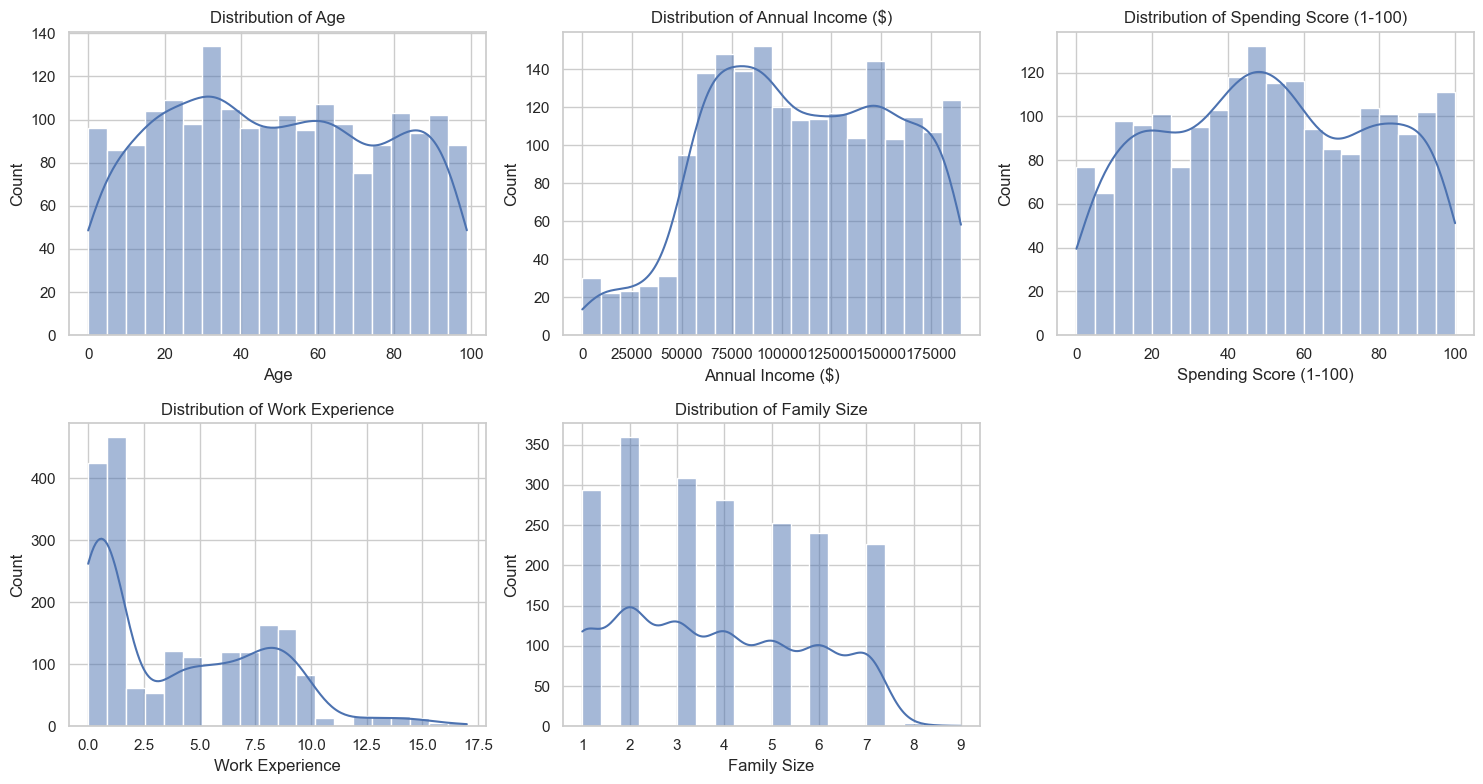

In [25]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Visualizing the distribution of numerical features
plt.figure(figsize=(15, 8))

# Histograms for numerical features
for i, col in enumerate(['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size'], start=1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

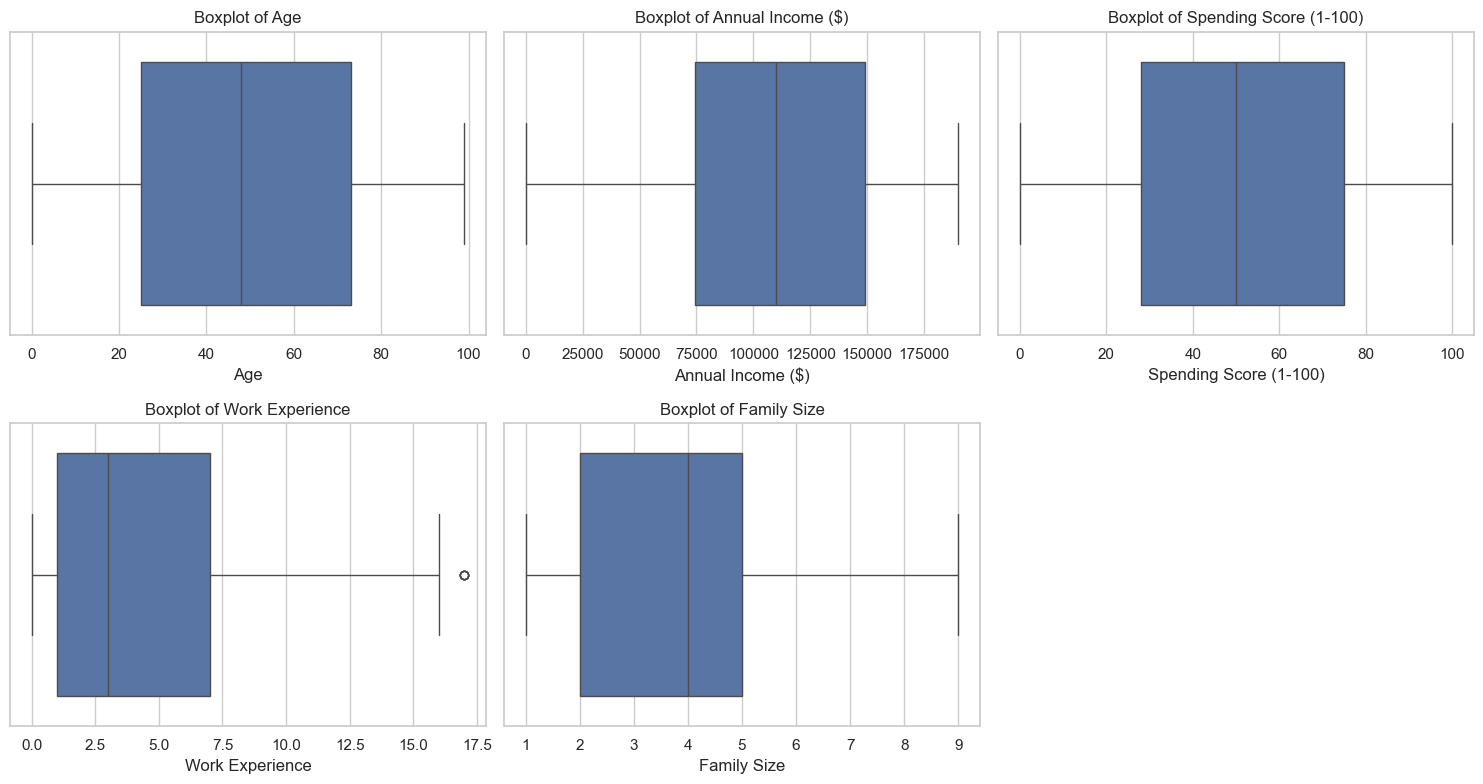

In [26]:
# Box plots for numerical features
plt.figure(figsize=(15, 8))
for i, col in enumerate(['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size'], start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

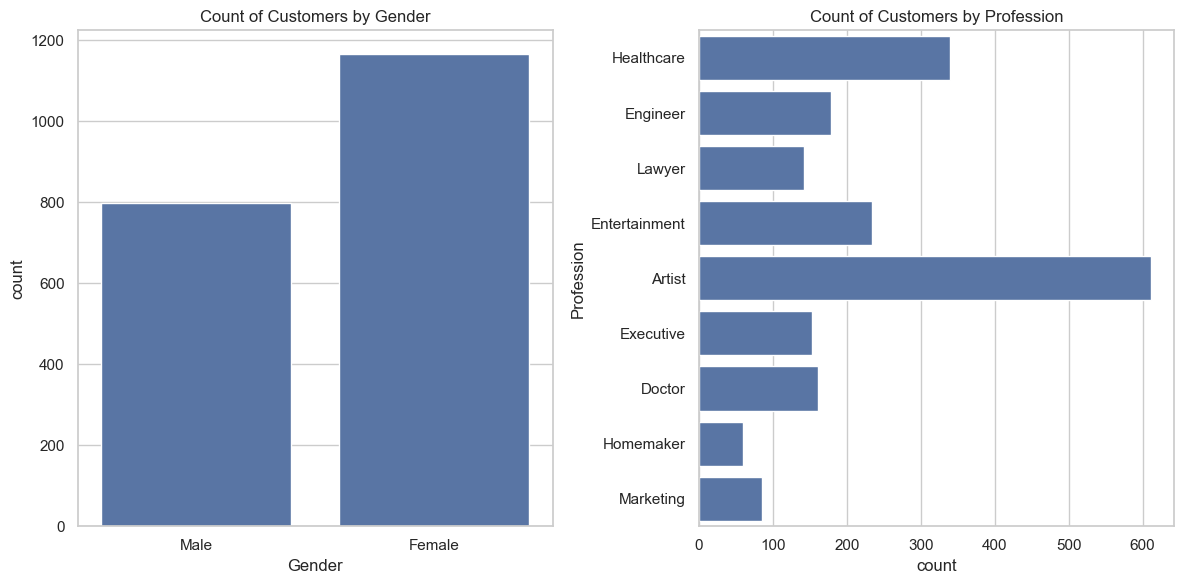

In [27]:
# Visualizing categorical features
plt.figure(figsize=(12, 6))


# Countplot for Gender
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=data)
plt.title('Count of Customers by Gender')

# Countplot for Profession
plt.subplot(1, 2, 2)
sns.countplot(y='Profession', data=data)
plt.title('Count of Customers by Profession')

plt.tight_layout()
plt.show()

In [28]:
# Create a copy to avoid modifying the original DataFrame
encoded_data = data.copy()

# Encode 'Gender' using LabelEncoder
label_encoder = LabelEncoder()
encoded_data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Encode 'Profession' using LabelEncoder
# Note: Handle missing values in 'Profession' before encoding, if needed
encoded_data['Profession'] = label_encoder.fit_transform(data['Profession'].astype(str))

# Display the first few rows of the encoded DataFrame
print(encoded_data.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1       1   19              15000                      39   
1           2       1   21              35000                      81   
2           3       0   20              86000                       6   
3           4       0   23              59000                      77   
4           5       0   31              38000                      40   

   Profession  Work Experience  Family Size  
0           5                1            4  
1           2                3            3  
2           2                1            1  
3           7                0            2  
4           3                2            6  


In [29]:
# Select relevant numerical columns for normalization
numerical_columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

# Create a copy to avoid modifying the original encoded DataFrame
normalized_data = encoded_data.copy()

# Initialize MinMaxScaler
#scaler = MinMaxScaler()

# Normalize the selected numerical columns
#normalized_data[numerical_columns] = scaler.fit_transform(encoded_data[numerical_columns])

# Drop the 'CustomerID' column
normalized_data = normalized_data.drop('CustomerID', axis=1)

# Display the modified DataFrame
normalized_data.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,19,15000,39,5,1,4
1,1,21,35000,81,2,3,3
2,0,20,86000,6,2,1,1
3,0,23,59000,77,7,0,2
4,0,31,38000,40,3,2,6


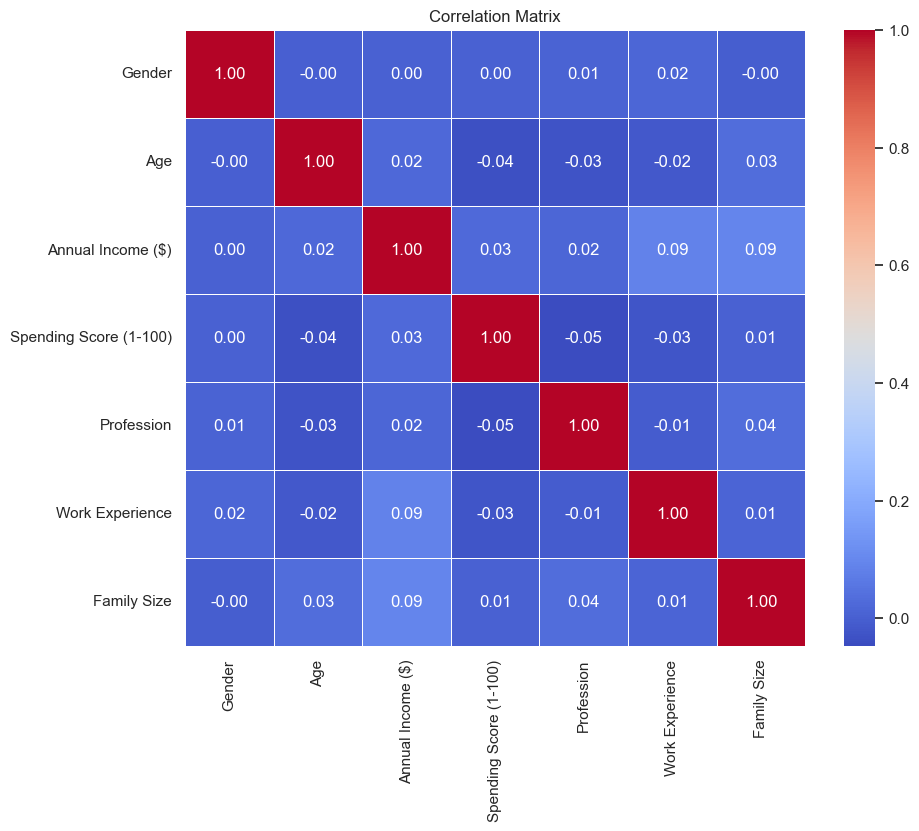

In [30]:
correlation_matrix = normalized_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

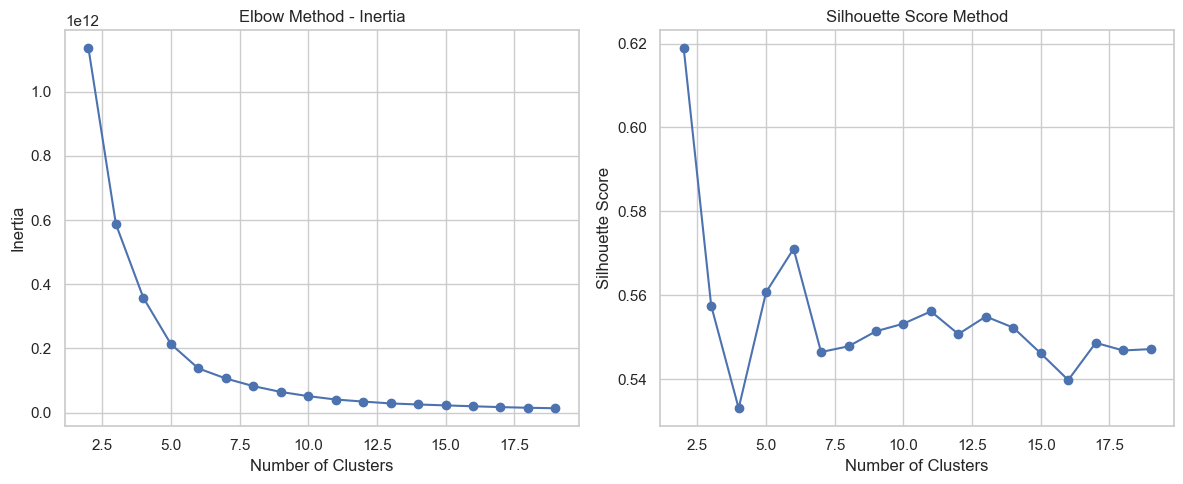

In [ ]:
X = normalized_data.values

# Try different numbers of clusters
cluster_range = range(2, 20)
inertia_values = []
silhouette_scores = []

for num_clusters in cluster_range:
    # Fit K-Means clustering model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    
    # Calculate inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)
    
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(12, 5))

# Plotting Inertia
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method - Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plotting Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [32]:
# Choose the optimal number of clusters (replace with the identified value)
optimal_num_clusters = 5

# Fit K-Means clustering model with optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_num_clusters, random_state=42, n_init=10)
normalized_data['Cluster'] = kmeans_optimal.fit_predict(X)

# Display the DataFrame with assigned clusters
print(normalized_data.head())

   Gender  Age  Annual Income ($)  Spending Score (1-100)  Profession  \
0       1   19              15000                      39           5   
1       1   21              35000                      81           2   
2       0   20              86000                       6           2   
3       0   23              59000                      77           7   
4       0   31              38000                      40           3   

   Work Experience  Family Size  Cluster  
0                1            4        4  
1                3            3        4  
2                1            1        2  
3                0            2        0  
4                2            6        4  


C:\Users\ramom\AppData\Local\Temp\ipykernel_3560\4236532770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=normalized_data, palette='viridis')


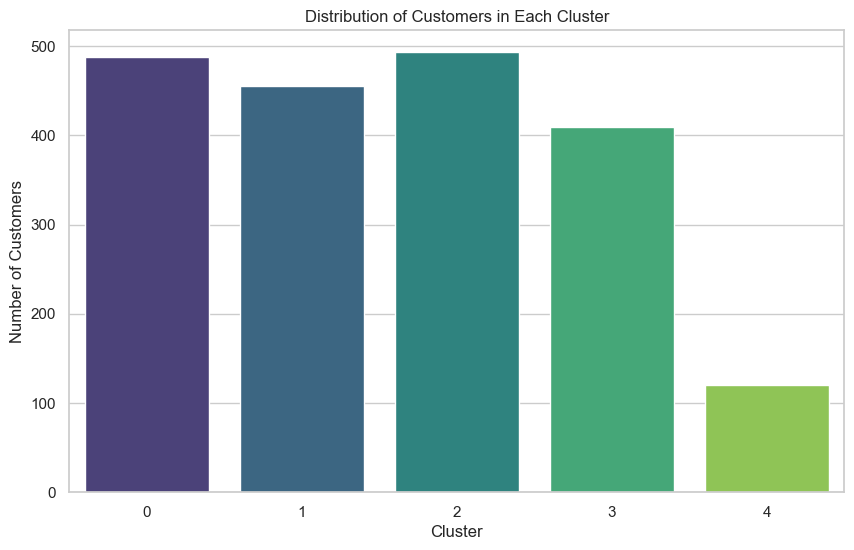

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=normalized_data, palette='viridis')
plt.title('Distribution of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

C:\Users\ramom\AppData\Local\Temp\ipykernel_3560\2235449948.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Annual Income ($)', data=normalized_data, palette='viridis')
C:\Users\ramom\AppData\Local\Temp\ipykernel_3560\2235449948.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=normalized_data, palette='viridis')


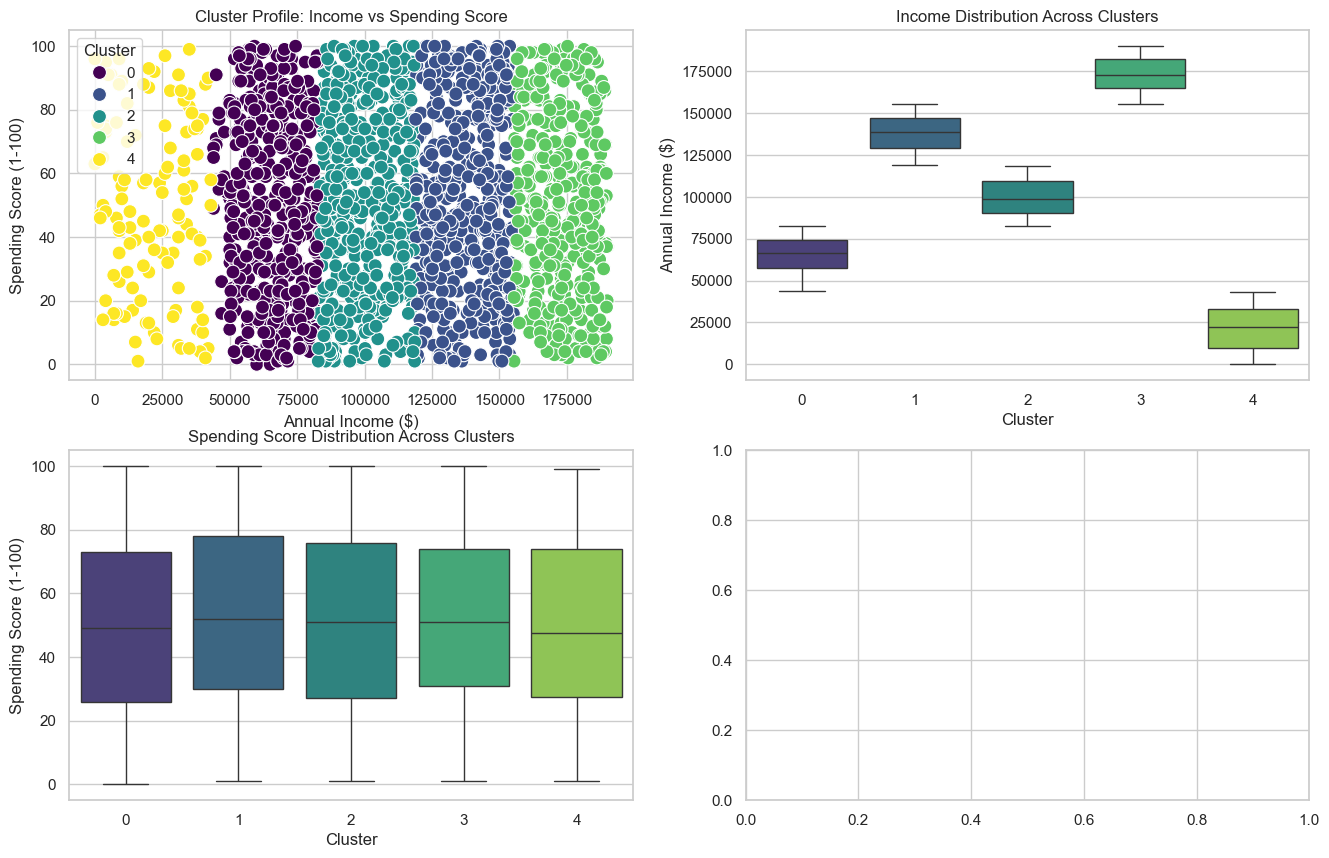

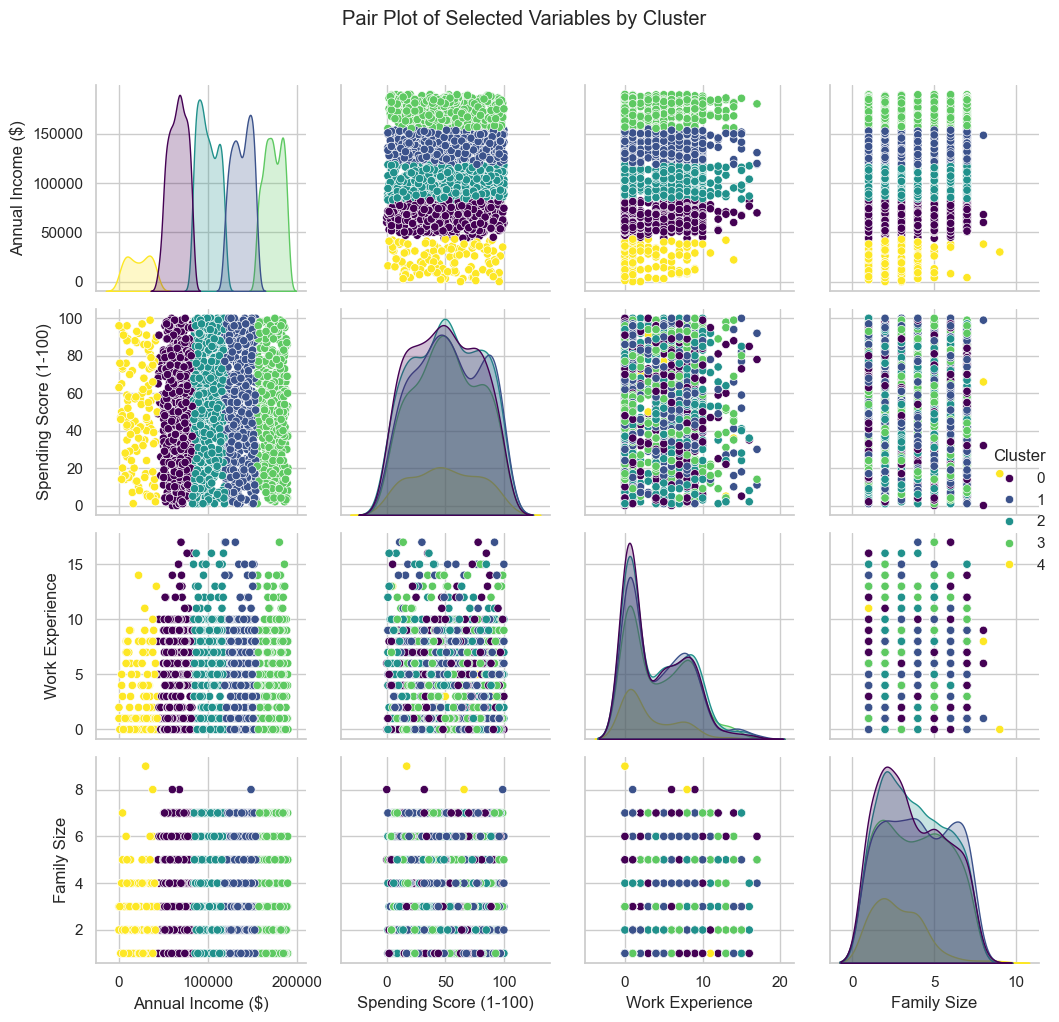

In [34]:
plt.figure(figsize=(16, 10))

# Scatter plot for Income vs Spending Score with clusters differentiated by color
plt.subplot(2, 2, 1)
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', hue='Cluster', data=normalized_data, palette='viridis', s=100)
plt.title('Cluster Profile: Income vs Spending Score')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')

# Box plot for Annual Income distribution across clusters
plt.subplot(2, 2, 2)
sns.boxplot(x='Cluster', y='Annual Income ($)', data=normalized_data, palette='viridis')
plt.title('Income Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Annual Income ($)')

# Box plot for Spending Score distribution across clusters
plt.subplot(2, 2, 3)
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=normalized_data, palette='viridis')
plt.title('Spending Score Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')

# Pair plot for selected variables
plt.subplot(2, 2, 4)
selected_vars = ['Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']
sns.pairplot(normalized_data, hue='Cluster', vars=selected_vars, palette='viridis')
plt.suptitle('Pair Plot of Selected Variables by Cluster', y=1.02)

plt.tight_layout()
plt.show()
